 Tal i com vàrem comentar a classe, apliqueu a les dades de dígits LED i les MNIST els mètodes que creieu oportuns, tant els de les dues pràctiques recents (arbres de classificació, bagging, random forests) com altres anteriors o, fins i tot, si voleu, el Naïve Bayes (hi  ha una funció naiveBayes al package e1071, però el podeu codificar vosaltres mateixos).  
No hem comentat encara a classe el Boosting. Ho farem el proper dimarts 3. No l'heu d'aplicar en aquesta tasca.

Procureu documentar bé el que escriviu, i també mesurar la qualitat dels resultats, en particular com varia aquesta en funció de paràmetres que es puguin ajustar, per exemple la complexitat dels arbres en CART o el nombre d'arbres en Bagging/Random Forests.



## Part 1: MNIST

In [1]:
require(keras)

Loading required package: keras


In [2]:
# We obtain and display the MNIST dataset
mnist = dataset_mnist()
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [3]:
# We prepare our data, separating into train and test sets
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# Reshape image matrices into 1-dimensional vectors
dim(x_train) <- c(nrow(x_train), 784)
dim(x_test) <- c(nrow(x_test), 784)

# Normalize pixel values
x_train <- x_train / 255
x_test <- x_test / 255

# Convert our response variables to factors
y_train <- as.factor(y_train)
y_test <- as.factor(y_test)

# Get amount of samples in each set
n_train <- length(y_train)
n_test <- length(y_test)

# Organize our training data in a dataframe
training_data <- data.frame('y' = y_train, 'x' = x_train)

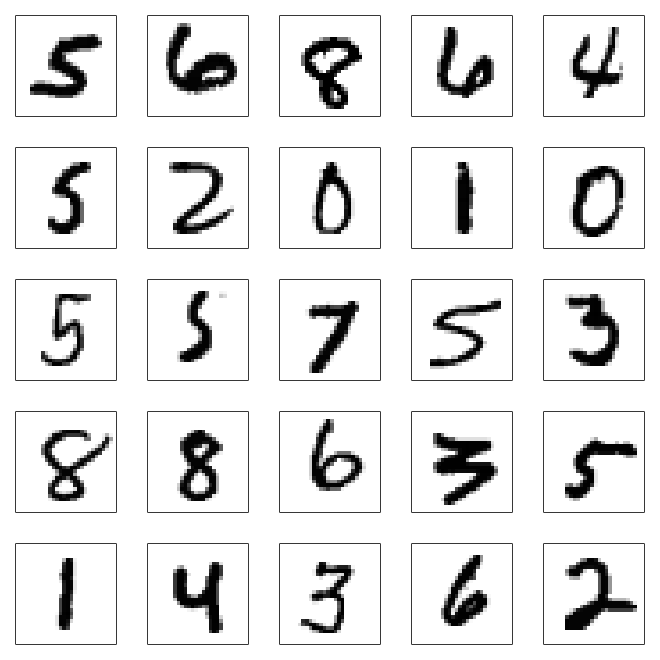

In [5]:
k<-5 
plot.zip.mosaic<-function(k){
old.par<-par(mfrow=c(k,k),mar=c(1,1,1,1))
    Indexes<-sample(n_train,k^2)
    for (i in Indexes) {
        m1<-t(matrix(x_train[i,],nrow=28,ncol=28))[,28:1]
        image(-m1,col=gray((0:255)/255),xaxt="n",yaxt="n")}
    par(old.par)}
options(repr.plot.width=5.5,repr.plot.height=5.5)
plot.zip.mosaic(k)

### Prediction using decision tree

In [5]:
# Fit a tree model with our formula
require(tree)
decision_tree <- tree(y~., data=training_data, control = tree.control(nobs = 800000, mincut = 5, minsize = 10, mindev = 0.01))

Loading required package: tree


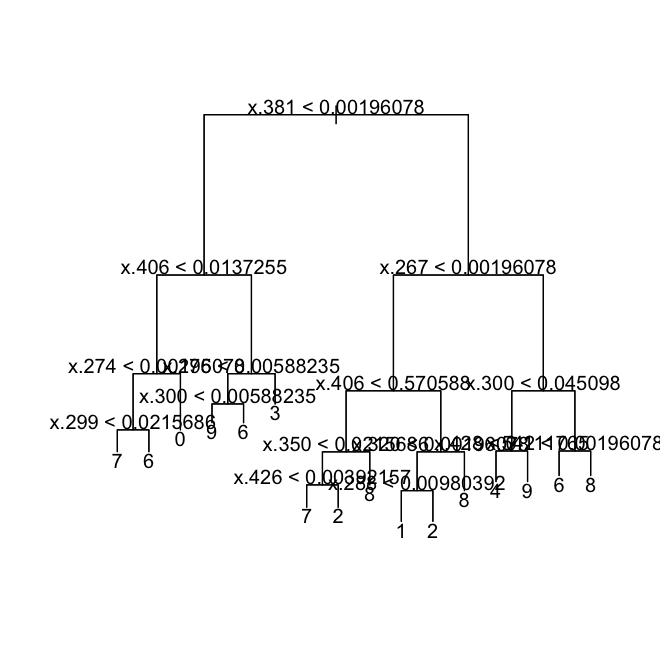

In [6]:
# Visualize our fitted model
plot(decision_tree)
text(decision_tree)

In [7]:
# Let's predict our samples in the x_test dataframe using our newly fitted model
predictions <- predict(decision_tree, data.frame('x' = x_test))
head(predictions)

0,1,2,3,4,5,6,7,8,9
0.036931818,0.001893939,0.01183712,0.009706439,0.019412879,0.022727273,0.007102273,0.861268939,0.0009469697,0.028172348
0.051415455,0.004437643,0.03091048,0.499617445,0.003366488,0.307268554,0.019433818,0.001836266,0.0557000765,0.026013772
0.000282446,0.842395142,0.04886315,0.021465895,0.001412230,0.007202373,0.014404745,0.005225251,0.0569128654,0.001835899
0.749465649,0.003358779,0.06229008,0.037862595,0.002442748,0.060305344,0.046412214,0.033282443,0.0012213740,0.003358779
0.001387444,0.029136316,0.14082553,0.031564343,0.106139438,0.005202914,0.024627125,0.496704821,0.0090183836,0.155393687
0.000282446,0.842395142,0.04886315,0.021465895,0.001412230,0.007202373,0.014404745,0.005225251,0.0569128654,0.001835899


In [8]:
# We proceed to compute the confusion matrix for this prediction tree given our yest values.
# From that, we calculate the accuracy of our model.
predicted_labels <- colnames(predictions)[apply(predictions, 1, which.max)]
confusion_matrix <- table(y_test, predicted_labels)
confusion_matrix

accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)
accuracy

      predicted_labels
y_test    0    1    2    3    4    6    7    8    9
     0  807    0    0   47    0   70   29   19    8
     1    0 1031   10    4    0    3   12   51   24
     2   54   79  528   42   19   57   82  151   20
     3   52   11   96  534   15   45   26   69  162
     4    2    2    4    2  506   55   69   84  258
     5   61    5    2  347   54   95   21  131  176
     6   60    7   15   24   29  660   26  123   14
     7   26    4   44    0   10   18  830   29   67
     8    1   30   29   64   18   52    4  710   66
     9    4    2   11   24   34   35   79   78  742

[1] 0.3622

As we can see, the accuracy of our computed model using the default values is very low. Only around 34 in every 100 samples are correctly categorized. It is worth mentioning that the model doesn't even take into account the existence of number 5. We will now proceed to tweak our model's parameters to try to improve it. 

In [9]:
# Using minsize 100, mindev 0.001
decision_tree <- tree(y~., data=training_data, control = tree.control(nobs = 800000, mincut = 50, minsize = 100, mindev = 0.001))

In [10]:
predictions <- predict(decision_tree, data.frame('x' = x_test))
predicted_labels <- colnames(predictions)[apply(predictions, 1, which.max)]
confusion_matrix <- table(y_test, predicted_labels)
accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)
accuracy

[1] 0.799

We can see how increasing the amount of nodes of our tree and, at the same time, decreasing the minimum distance between branches produces radically better results.

## Prediction using random forests

In [6]:
require(randomForest)

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [14]:
rf <- randomForest(y ~ . , data = training_data)

## Prediction using bagging

In [4]:
library(ipred)
library(rpart)
library(MASS)
library(TH.data)

Loading required package: survival

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



In [ ]:
gbag <- bagging(y ~ ., data = training_data, coob=TRUE)
print(gbag)